In [121]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [122]:
dat = pd.read_csv('data.csv')
data.head(20)

,X1,X2,Y
0,3.8915,4.2105,0
1,3.6898,6.6051,0
2,2.7763,7.5057,0
3,3.1137,5.7724,0
4,2.9251,5.4315,0
5,3.6699,6.4406,0
6,2.8404,3.8136,0
7,3.7729,5.2398,0
8,2.6465,3.4946,0
9,4.0902,5.9298,0


In [123]:
X = dat[['X1', 'X2']]
y = dat['Y']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear', C=0.1)
model.fit(X_train_scaled, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 0.82868511 -0.8330252 ]]
Intercept: [0.09260778]


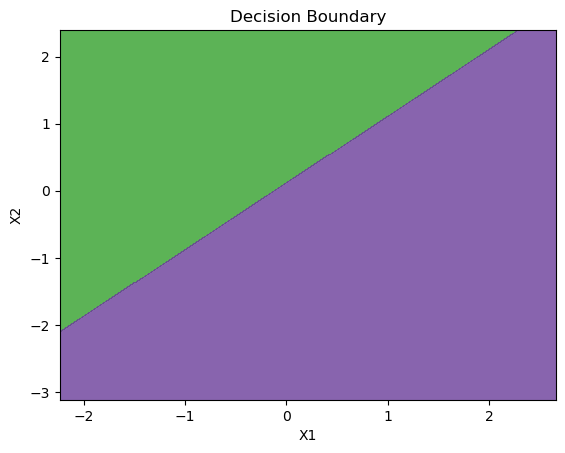

In [125]:




# Plot decision boundary
plt.xlabel('X1')
plt.ylabel('X2') 

# Plot decision boundary line
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=plt.cm.Paired, alpha=0.8)
plt.title('Decision Boundary')
plt.show()


In [126]:
X = data[['X1', 'X2']]
y = data['Y']


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term to features
X_train_scaled_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled].astype(np.float32)

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [128]:
class LogisticRegressionModel(tf.Module):
    def __init__(self, num_features):
        self.W = tf.Variable(tf.zeros((num_features, 2), dtype=tf.float32), name='weights')

    def __call__(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W))

In [129]:
def cross_entropy(y_true, y_pred):
    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))


In [130]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape

    model = LogisticRegressionModel(num_features)

    optimizer = tf.optimizers.SGD(learning_rate)

    costs = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            current_cost = cross_entropy(y, y_pred)

        gradients = tape.gradient(current_cost, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        costs.append(current_cost.numpy())

        print(f'Epoch {epoch + 1}/{num_epochs}, Cost: {current_cost.numpy()}')

    return model, costs

# Train the logistic regression model
learning_rate = 0.1
num_epochs = 1000

model, costs = train_logistic_regression(X_train_scaled_with_bias, y_train_one_hot, learning_rate, num_epochs)



Epoch 1/1000, Cost: 0.6931471824645996
Epoch 2/1000, Cost: 0.6496809720993042
Epoch 3/1000, Cost: 0.6123498678207397
Epoch 4/1000, Cost: 0.5802021026611328
Epoch 5/1000, Cost: 0.5524017214775085
Epoch 6/1000, Cost: 0.528236985206604
Epoch 7/1000, Cost: 0.5071133375167847
Epoch 8/1000, Cost: 0.48854026198387146
Epoch 9/1000, Cost: 0.4721147418022156
Epoch 10/1000, Cost: 0.4575067162513733
Epoch 11/1000, Cost: 0.4444451332092285
Epoch 12/1000, Cost: 0.4327070116996765
Epoch 13/1000, Cost: 0.422107994556427
Epoch 14/1000, Cost: 0.41249507665634155
Epoch 15/1000, Cost: 0.4037403166294098
Epoch 16/1000, Cost: 0.39573636651039124
Epoch 17/1000, Cost: 0.3883925974369049
Epoch 18/1000, Cost: 0.3816320598125458
Epoch 19/1000, Cost: 0.37538906931877136
Epoch 20/1000, Cost: 0.3696073889732361
Epoch 21/1000, Cost: 0.36423835158348083
Epoch 22/1000, Cost: 0.35923999547958374
Epoch 23/1000, Cost: 0.3545757234096527
Epoch 24/1000, Cost: 0.35021352767944336
Epoch 25/1000, Cost: 0.34612542390823364
Epo

Epoch 216/1000, Cost: 0.2431676834821701
Epoch 217/1000, Cost: 0.24311187863349915
Epoch 218/1000, Cost: 0.24305668473243713
Epoch 219/1000, Cost: 0.24300210177898407
Epoch 220/1000, Cost: 0.24294817447662354
Epoch 221/1000, Cost: 0.24289485812187195
Epoch 222/1000, Cost: 0.2428421527147293
Epoch 223/1000, Cost: 0.24279001355171204
Epoch 224/1000, Cost: 0.2427384853363037
Epoch 225/1000, Cost: 0.24268750846385956
Epoch 226/1000, Cost: 0.24263712763786316
Epoch 227/1000, Cost: 0.24258732795715332
Epoch 228/1000, Cost: 0.24253806471824646
Epoch 229/1000, Cost: 0.24248936772346497
Epoch 230/1000, Cost: 0.24244117736816406
Epoch 231/1000, Cost: 0.24239353835582733
Epoch 232/1000, Cost: 0.24234643578529358
Epoch 233/1000, Cost: 0.24229983985424042
Epoch 234/1000, Cost: 0.24225373566150665
Epoch 235/1000, Cost: 0.24220815300941467
Epoch 236/1000, Cost: 0.24216309189796448
Epoch 237/1000, Cost: 0.2421184778213501
Epoch 238/1000, Cost: 0.2420743703842163
Epoch 239/1000, Cost: 0.242030739784240

Epoch 435/1000, Cost: 0.23821568489074707
Epoch 436/1000, Cost: 0.23820824921131134
Epoch 437/1000, Cost: 0.2382008582353592
Epoch 438/1000, Cost: 0.2381935566663742
Epoch 439/1000, Cost: 0.2381862848997116
Epoch 440/1000, Cost: 0.2381790578365326
Epoch 441/1000, Cost: 0.23817190527915955
Epoch 442/1000, Cost: 0.23816481232643127
Epoch 443/1000, Cost: 0.2381577491760254
Epoch 444/1000, Cost: 0.23815079033374786
Epoch 445/1000, Cost: 0.23814384639263153
Epoch 446/1000, Cost: 0.23813696205615997
Epoch 447/1000, Cost: 0.2381301373243332
Epoch 448/1000, Cost: 0.23812337219715118
Epoch 449/1000, Cost: 0.23811662197113037
Epoch 450/1000, Cost: 0.23810997605323792
Epoch 451/1000, Cost: 0.23810331523418427
Epoch 452/1000, Cost: 0.2380967140197754
Epoch 453/1000, Cost: 0.23809020221233368
Epoch 454/1000, Cost: 0.23808372020721436
Epoch 455/1000, Cost: 0.238077312707901
Epoch 456/1000, Cost: 0.23807092010974884
Epoch 457/1000, Cost: 0.23806460201740265
Epoch 458/1000, Cost: 0.23805829882621765
E

Epoch 649/1000, Cost: 0.23741097748279572
Epoch 650/1000, Cost: 0.23740939795970917
Epoch 651/1000, Cost: 0.23740777373313904
Epoch 652/1000, Cost: 0.2374061644077301
Epoch 653/1000, Cost: 0.23740455508232117
Epoch 654/1000, Cost: 0.2374029904603958
Epoch 655/1000, Cost: 0.23740144073963165
Epoch 656/1000, Cost: 0.2373998612165451
Epoch 657/1000, Cost: 0.23739831149578094
Epoch 658/1000, Cost: 0.23739679157733917
Epoch 659/1000, Cost: 0.237395241856575
Epoch 660/1000, Cost: 0.23739370703697205
Epoch 661/1000, Cost: 0.23739221692085266
Epoch 662/1000, Cost: 0.23739071190357208
Epoch 663/1000, Cost: 0.2373892366886139
Epoch 664/1000, Cost: 0.2373877465724945
Epoch 665/1000, Cost: 0.23738627135753632
Epoch 666/1000, Cost: 0.2373848408460617
Epoch 667/1000, Cost: 0.23738336563110352
Epoch 668/1000, Cost: 0.2373819649219513
Epoch 669/1000, Cost: 0.2373805046081543
Epoch 670/1000, Cost: 0.2373790740966797
Epoch 671/1000, Cost: 0.23737767338752747
Epoch 672/1000, Cost: 0.23737628757953644
Epo

Epoch 860/1000, Cost: 0.23722390830516815
Epoch 861/1000, Cost: 0.23722343146800995
Epoch 862/1000, Cost: 0.2372230589389801
Epoch 863/1000, Cost: 0.23722262680530548
Epoch 864/1000, Cost: 0.23722222447395325
Epoch 865/1000, Cost: 0.23722179234027863
Epoch 866/1000, Cost: 0.2372213900089264
Epoch 867/1000, Cost: 0.23722100257873535
Epoch 868/1000, Cost: 0.23722057044506073
Epoch 869/1000, Cost: 0.23722019791603088
Epoch 870/1000, Cost: 0.23721978068351746
Epoch 871/1000, Cost: 0.23721937835216522
Epoch 872/1000, Cost: 0.23721900582313538
Epoch 873/1000, Cost: 0.23721858859062195
Epoch 874/1000, Cost: 0.2372182309627533
Epoch 875/1000, Cost: 0.23721785843372345
Epoch 876/1000, Cost: 0.23721745610237122
Epoch 877/1000, Cost: 0.2372170388698578
Epoch 878/1000, Cost: 0.23721668124198914
Epoch 879/1000, Cost: 0.23721632361412048
Epoch 880/1000, Cost: 0.23721592128276825
Epoch 881/1000, Cost: 0.2372155636548996
Epoch 882/1000, Cost: 0.23721519112586975
Epoch 883/1000, Cost: 0.237214803695678

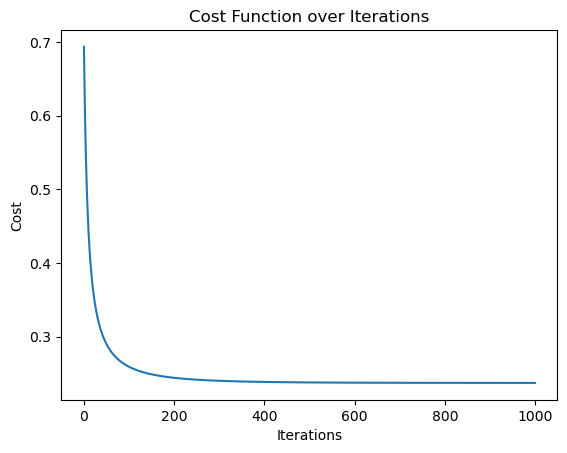

In [131]:
# Plot the cost function over epochs
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [132]:
final_cost_value = costs[-1]
print("Final Cost Function Value:", final_cost_value)

Final Cost Function Value: 0.23718414


In [133]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape

    model = LogisticRegressionModel(num_features)

    optimizer = tf.optimizers.SGD(learning_rate)

    costs = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            current_cost = cross_entropy(y, y_pred)

        gradients = tape.gradient(current_cost, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        costs.append(current_cost.numpy())

        print(f'Epoch {epoch + 1}/{num_epochs}, Cost: {current_cost.numpy()}')

    return model, costs

# Train the logistic regression model
learning_rate = 0.1
num_epochs = 100

model, costs = train_logistic_regression(X_train_scaled_with_bias, y_train_one_hot, learning_rate, num_epochs)



Epoch 1/100, Cost: 0.6931471824645996
Epoch 2/100, Cost: 0.6496809720993042
Epoch 3/100, Cost: 0.6123498678207397
Epoch 4/100, Cost: 0.5802021026611328
Epoch 5/100, Cost: 0.5524017214775085
Epoch 6/100, Cost: 0.528236985206604
Epoch 7/100, Cost: 0.5071133375167847
Epoch 8/100, Cost: 0.48854026198387146
Epoch 9/100, Cost: 0.4721147418022156
Epoch 10/100, Cost: 0.4575067162513733
Epoch 11/100, Cost: 0.4444451332092285
Epoch 12/100, Cost: 0.4327070116996765
Epoch 13/100, Cost: 0.422107994556427
Epoch 14/100, Cost: 0.41249507665634155
Epoch 15/100, Cost: 0.4037403166294098
Epoch 16/100, Cost: 0.39573636651039124
Epoch 17/100, Cost: 0.3883925974369049
Epoch 18/100, Cost: 0.3816320598125458
Epoch 19/100, Cost: 0.37538906931877136
Epoch 20/100, Cost: 0.3696073889732361
Epoch 21/100, Cost: 0.36423835158348083
Epoch 22/100, Cost: 0.35923999547958374
Epoch 23/100, Cost: 0.3545757234096527
Epoch 24/100, Cost: 0.35021352767944336
Epoch 25/100, Cost: 0.34612542390823364
Epoch 26/100, Cost: 0.342286

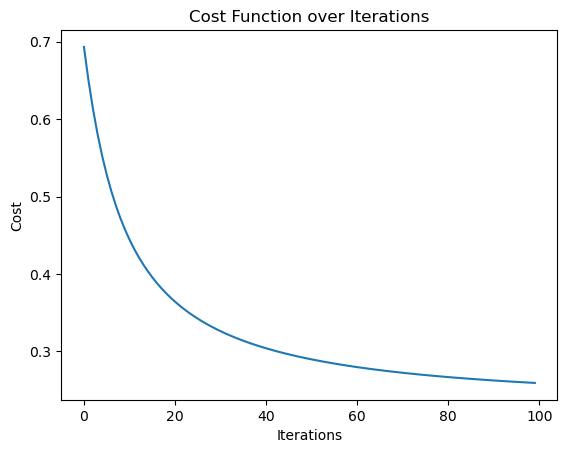

In [134]:
# Plot the cost function over epochs
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [135]:
def train_logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape

    model = LogisticRegressionModel(num_features)

    optimizer = tf.optimizers.SGD(learning_rate)

    costs = []

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            current_cost = cross_entropy(y, y_pred)

        gradients = tape.gradient(current_cost, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        costs.append(current_cost.numpy())

        print(f'Epoch {epoch + 1}/{num_epochs}, Cost: {current_cost.numpy()}')

    return model, costs

# Train the logistic regression model
learning_rate = 5
num_epochs = 100

model, costs = train_logistic_regression(X_train_scaled_with_bias, y_train_one_hot, learning_rate, num_epochs)



Epoch 1/100, Cost: 0.6931471824645996
Epoch 2/100, Cost: 0.2578355669975281
Epoch 3/100, Cost: 0.24415946006774902
Epoch 4/100, Cost: 0.24100670218467712
Epoch 5/100, Cost: 0.24001844227313995
Epoch 6/100, Cost: 0.23941972851753235
Epoch 7/100, Cost: 0.2389531135559082
Epoch 8/100, Cost: 0.2385757863521576
Epoch 9/100, Cost: 0.2382708489894867
Epoch 10/100, Cost: 0.23802590370178223
Epoch 11/100, Cost: 0.23783059418201447
Epoch 12/100, Cost: 0.23767609894275665
Epoch 13/100, Cost: 0.23755469918251038
Epoch 14/100, Cost: 0.23745998740196228
Epoch 15/100, Cost: 0.23738661408424377
Epoch 16/100, Cost: 0.23733007907867432
Epoch 17/100, Cost: 0.23728680610656738
Epoch 18/100, Cost: 0.23725378513336182
Epoch 19/100, Cost: 0.23722875118255615
Epoch 20/100, Cost: 0.23720984160900116
Epoch 21/100, Cost: 0.23719558119773865
Epoch 22/100, Cost: 0.23718488216400146
Epoch 23/100, Cost: 0.23717689514160156
Epoch 24/100, Cost: 0.23717093467712402
Epoch 25/100, Cost: 0.23716644942760468
Epoch 26/100, 

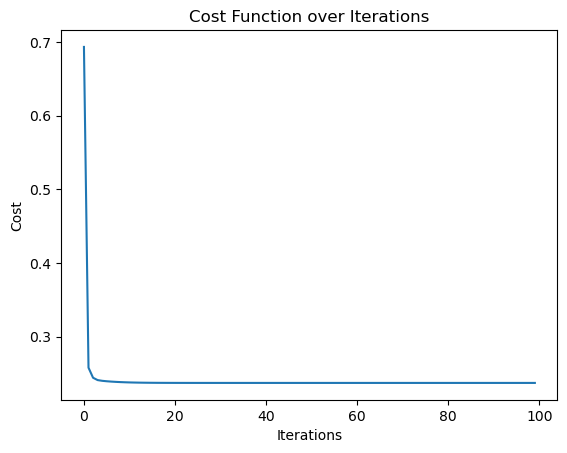

In [136]:
# Plot the cost function over epochs
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

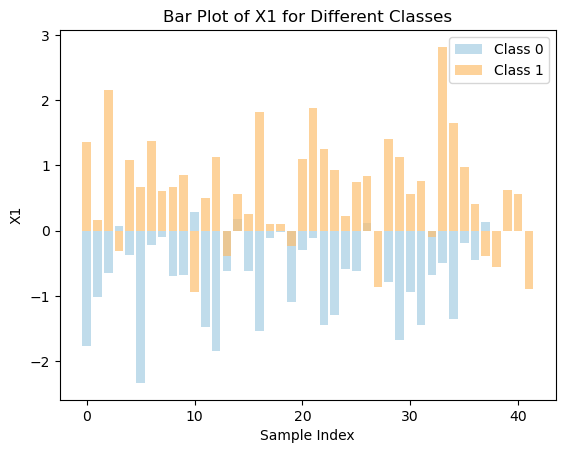

In [137]:
# Create a bar plot for the given dataset with different colors for different classes
class_labels = np.unique(y_train)

for class_label in class_labels:
    class_data = X_train_scaled[y_train == class_label]
    plt.bar(range(len(class_data)), class_data[:, 0], color=plt.cm.Paired(class_label / len(class_labels)), label=f'Class {class_label}', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('X1')
plt.title('Bar Plot of X1 for Different Classes')
plt.legend()
plt.show()


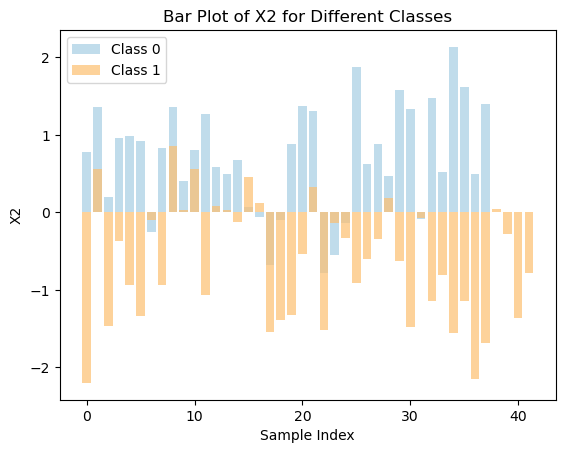

In [138]:
# Create a bar plot for the given dataset with different colors for different classes (X2 feature)
class_labels = np.unique(y_train)

for class_label in class_labels:
    class_data = X_train_scaled[y_train == class_label]
    plt.bar(range(len(class_data)), class_data[:, 1], color=plt.cm.Paired(class_label / len(class_labels)), label=f'Class {class_label}', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('X2')
plt.title('Bar Plot of X2 for Different Classes')
plt.legend()
plt.show()


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Predict labels on training data
y_train_pred = np.argmax(model(X_train_scaled_with_bias).numpy(), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')

# Display metrics


Confusion Matrix:
[[35  3]
 [ 5 37]]


In [120]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 90.00%
Precision: 0.90
Recall: 0.90
